In [1]:
#from Klassen.MertonJumpDiffusion import merton_jump_paths
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest


,MertonData
0,100.434818
1,92.218312
2,88.264876
3,88.885323
4,91.644866
...,...
95,24.709534
96,25.219973
97,25.722306
98,25.677145


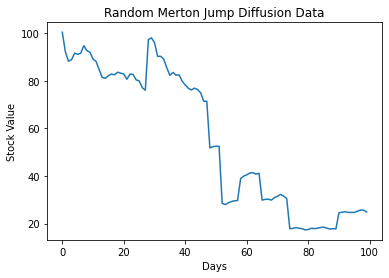

In [6]:
# example parameters
S = 100  # current stock price
T = 1  # time to maturity
r = 0.02  # risk free rate
m = 0  # meean of jump size
v = 0.3  # standard deviation of jump
lam = 10  # intensity of jump i.e. number of jumps per annum
steps = 100  # time steps
paths = 1  # number of paths to simulate
sigma = 0.2  # annaul standard deviation , for weiner process

# generate data
dataMerton = merton_jump_paths(S,T,r,sigma,lam,m,v,steps,paths)

plt.title("Random Merton Jump Diffusion Data")
plt.plot(dataMerton)
plt.ylabel("Stock Value")
plt.xlabel("Days")

data = pd.DataFrame(dataMerton, columns=["MertonData"])
data

<AxesSubplot:>

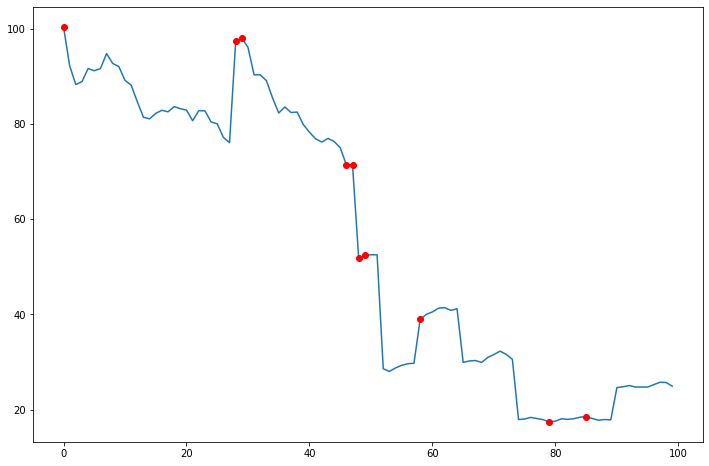

In [7]:
iso = IsolationForest(n_estimators=50,
                      max_samples='auto',
                      contamination=float(0.1),
                      max_features=1.0)
x = np.array(data.MertonData).reshape(len(data.MertonData),1)

predicted_values = iso.fit_predict(x)
data['Anomaly'] = predicted_values
data['MertonData'].plot()
data[(data['Anomaly'] == -1)]['MertonData'].plot(figsize=(12,8),style='o', color='red')




Features